In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense 
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# url for the dataset
url = 'https://github.com/burskapasi/DeepLearningData/blob/main/cancer.csv'


In [6]:
pwd

'/Users/burhan/Downloads/Burhanuddin'

In [7]:
# Load dataset
df = pd.read_csv('/Users/burhan/Downloads/Burhanuddin/cancer.csv')

In [8]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [9]:
# As last column has a lot of NaN. Droping the column
df.drop('Unnamed: 32', axis =1, inplace = True)

In [10]:
#  Creating a column to convert diagnosis to binary. First filling it with 0. Changing each row with M to 1 in the cancer column. 
df['cancer'] = 0 # Benign
df['cancer'].loc[df['diagnosis'] == 'M'] = 1 # Malign
# Droping the diagnosis column
df.drop('diagnosis', axis =1, inplace = True)

/Users/burhan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [11]:
# Checking if the column cancer made the changes
df['cancer'].value_counts()

0    357
1    212
Name: cancer, dtype: int64

In [12]:
# Creating input and output variables for the model
X = df.drop(columns=['cancer'])
y = df[['cancer']]

In [13]:
#  Checking if cancer column was dropped
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
# Checking if it contains only cancer column
y.head(23)

,cancer
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [15]:
# Creating model
model = Sequential()
model.add(Dense(10, input_dim = X.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(y.shape[1], activation='sigmoid'))
model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])

In [16]:
# Spliting the data to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

In [17]:
# scaling the values
x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.transform(X_test)

In [18]:
# # make sure values are between 0-1
print("Min x:", np.min(X_train))
print("Max x:", np.max(X_train))

Min x: 0.0
Max x: 1.0000000000000002


In [19]:
history = model.fit(X_train, y_train, epochs=100, batch_size=50)

Epoch 1/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6999 - accuracy: 0.6194
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.6194
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.6194
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.6194
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6802 - accuracy: 0.6194
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6752 - accuracy: 0.6194
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6703 - accuracy: 0.6194
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6646 - accuracy: 0.6194
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6583 - accuracy: 0.6194
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6513 - accuracy: 0.6352
Epoch 11/100
8/8 [===========

8/8 [==============================] - 0s 3ms/step - loss: 0.1157 - accuracy: 0.9633
Epoch 85/100
8/8 [==============================] - 0s 2ms/step - loss: 0.1141 - accuracy: 0.9633
Epoch 86/100
8/8 [==============================] - 0s 2ms/step - loss: 0.1126 - accuracy: 0.9633
Epoch 87/100
8/8 [==============================] - 0s 2ms/step - loss: 0.1114 - accuracy: 0.9659
Epoch 88/100
8/8 [==============================] - 0s 3ms/step - loss: 0.1107 - accuracy: 0.9633
Epoch 89/100
8/8 [==============================] - 0s 2ms/step - loss: 0.1093 - accuracy: 0.9659
Epoch 90/100
8/8 [==============================] - 0s 2ms/step - loss: 0.1080 - accuracy: 0.9659
Epoch 91/100
8/8 [==============================] - 0s 1ms/step - loss: 0.1067 - accuracy: 0.9685
Epoch 92/100
8/8 [==============================] - 0s 1ms/step - loss: 0.1053 - accuracy: 0.9711
Epoch 93/100
8/8 [==============================] - 0s 3ms/step - loss: 0.1041 - accuracy: 0.9685
Epoch 94/100
8/8 [===============

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

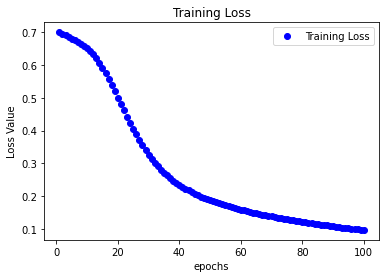

In [21]:
# Ploting training loss
loss_values = history_dict['loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = "Training Loss")
plt.title("Training Loss")
plt.xlabel('epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()